#Helper

In [1]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
def Loc_Trung_binh_so_hoc(img, ksize):
    m, n = img.shape
    img_res = np.zeros([m, n])
    padded_img = np.pad(img, pad_width=(ksize -1) // 2)
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            img_res[i,j] = np.mean(vung_anh_kich_thuoc_k)
    return img_res

def Loc_Trung_binh_hinh_hoc(img, ksize):
    m, n = img.shape
    img_res = np.zeros([m, n])
    padded_img = np.pad(img, pad_width=(ksize -1) // 2)
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            gia_tri_TB_cuc_bo = np.mean(vung_anh_kich_thuoc_k)
            gia_tri_loc = np.prod(vung_anh_kich_thuoc_k) ** (1.0 / m * n)
            if gia_tri_loc > gia_tri_TB_cuc_bo:
               img_res[i, j]= int(gia_tri_TB_cuc_bo)
            else:
               img_res[i,j] = int(gia_tri_loc)
    return img_res

def Loc_Trung_binh_Harmonic(img, ksize):
    m, n = img.shape
    img_ket_qua_anh_loc = np.zeros([m, n])
    padded_img = np.pad(img, pad_width=(ksize -1) // 2)
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            gia_tri_TB_cuc_bo = np.mean(vung_anh_kich_thuoc_k)
            gia_tri_loc = np.sum(m*n/1/vung_anh_kich_thuoc_k)
            if gia_tri_loc > gia_tri_TB_cuc_bo:
                img_ket_qua_anh_loc[i, j] = gia_tri_TB_cuc_bo
            else:
                img_ket_qua_anh_loc[i, j] = gia_tri_loc
    return img_ket_qua_anh_loc

def Loc_Trung_Vi_thich_nghi(img,ksize,Smax): 
    m,n = img.shape  
    img_result= np.zeros([m, n])
    h = (Smax-1)//2    # K max tương tự S max
    # padded_img = np.pad(img,(h,h),mode='reflect')  #Thêm lề ảnh
    padded_img = np.pad(img, pad_width=(Smax-1)//2)
    for i in range(m):
        for j in range(n):
            k = ksize
            vung_anh_kich_thuoc_k = padded_img[h+i:h+ i+k,h+j:h+j+k] 
            while True:
                # Level A
                z_min = np.min(vung_anh_kich_thuoc_k)
                z_max = np.max(vung_anh_kich_thuoc_k)
                z_med = np.median(vung_anh_kich_thuoc_k)
                if z_min < z_med <z_max:
                    # Go to level B
                    if int(img[i, j]) < int(img[i, j]) < int(img[i, j]):
                        img_result[i,j] = img[i,j]
                    else:
                        img_result[i, j] = z_med
                    break 
                else: # Return A
                    k += 1
                    Snew = k*2+1
                    if Snew <= Smax :
                        vung_anh_kich_thuoc_k = padded_img[i:i+k,j:j+k]
                    else :
                        img_result[i,j] = z_med
                        break 
    return img_result

#Khai báo class và function

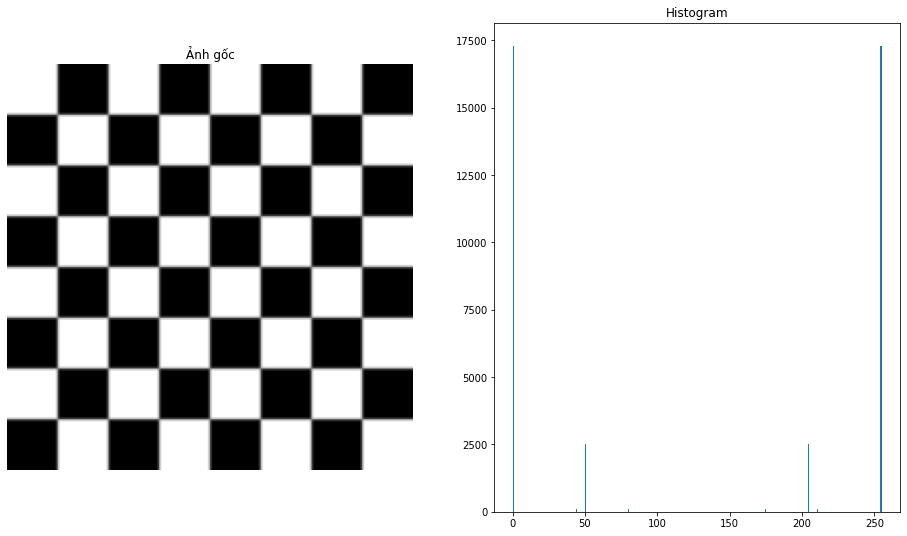

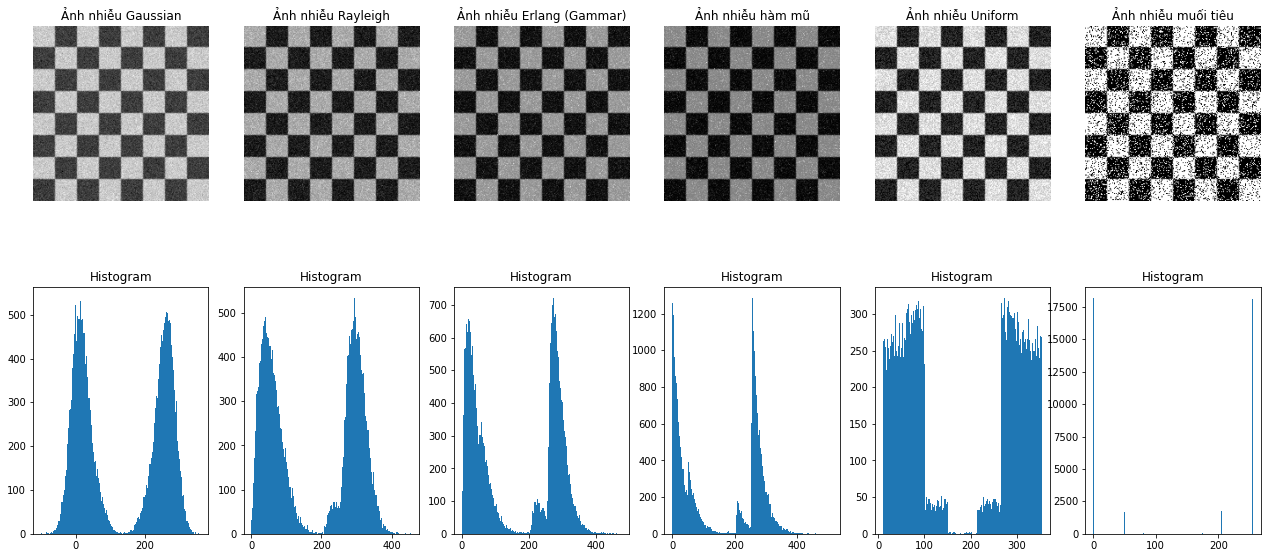

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data # lấy ảnh có sẵn trong skimage để demo
from skimage.util import random_noise
from scipy import ndimage, misc

checkerboard = data.checkerboard()
img = checkerboard # img = cv2.imread('path',0) nếu dùng openCV

def Gaussian(img, mean = 10, var = 25): # nhiễu Gaussian 
  noise = np.random.normal(loc=mean, scale=var, size=img.shape[:2])
  return img + noise

def Rayleigh(img, var = 40): # nhiễu Rayleigh 
  noise = np.random.rayleigh(scale=var, size=img.shape[:2])
  return img + noise

def Erlang(img, K = 2.0, var = 18): # nhiễu Erlang (Gammar) 
  noise = np.random.gamma(shape=K,scale=var, size=img.shape[:2])
  return img + noise

def Exponential(img, var = 26): # nhiễu hàm mũ 
  noise = np.random.exponential(scale=var, size=img.shape[:2])
  return img + noise

def Uniform(img, a = 10, b = 100): # nhiễu Uniform 
  noise = np.random.uniform(low=a,high=b,size=img.shape[:2])
  return img + noise

def SaltPepper(img):# nhiễu muối tiêu (add salt and pepper) 
  return random_noise(img, mode='s&p', amount=0.3) * 255

fig0 = plt.figure(figsize=(16, 9))
(ax1, ax2) = fig0.subplots(1, 2)
# Hiển thị ảnh gốc
ax1.imshow(img, cmap='gray')
ax1.set_title('Ảnh gốc')
ax1.axis('off')
# Hiển thị histogram ảnh gốc
ax2.hist(img.flatten(),bins=256)
ax2.set_title('Histogram')

fig1 = plt.figure(figsize=(22, 10))
fig1.subplots(2, 6)

l = [("Ảnh gốc", img), ("Ảnh nhiễu Gaussian", Gaussian(img)), ("Ảnh nhiễu Rayleigh", Rayleigh(img)), ("Ảnh nhiễu Erlang (Gammar)",Erlang(img)),\
     ("Ảnh nhiễu hàm mũ", Exponential(img)), ('Ảnh nhiễu Uniform', Uniform(img)), ('Ảnh nhiễu muối tiêu', SaltPepper(img))]



for i, ax in  enumerate(fig1.get_axes()): 
    ax.axis('off')
    if (i <=5):
      ax.set_title(l[i%6+1][0])
      ax.imshow(l[i%6+1][1], cmap='gray')
      # ax.axis('off')
    if (i>5):
      ax.hist(l[i%6+1][1].flatten(),bins=256)
      ax.set_title('Histogram')
      ax.axis('on')
plt.show()


In [3]:
from matplotlib.cbook import index_of
class image_restoration():
  def __init__(self, input = None):
    if input is None: 
      input = data.camera()
    self.input = input
    self.img_pepper = random_noise(input, mode='pepper', amount=0.1) * 255
    self.img_salt = random_noise(input, mode='salt', amount=0.1) * 255
    self.img_s_and_p = random_noise(input, mode='s&p', amount=0.1) * 255
    self.img_uniform = Uniform(input)
    self.img_gauss = random_noise(input, mode='gaussian') * 255
  def locTK(self):
    a = ndimage.maximum_filter(self.img_pepper, size=3)
    b = ndimage.minimum_filter(self.img_salt, size= 3)
    c = (ndimage.maximum_filter(self.img_uniform, size=3) + ndimage.minimum_filter(self.img_uniform, size= 3)) /2
    lst = [("nhiễu hạt tiêu", self.img_pepper), ("sau khi lọc TKTT Max", a), \
         ("nhiễu muối", self.img_salt), ("sau khi lọc TKTT Min", b), \
         ("nhiễu muối tiêu", self.img_s_and_p), ("sau khi lọc trung vị", ndimage.median_filter(self.img_salt, size=5)), \
         ("nhiễu uniform", self.img_uniform), ("sau khi lọc TKTT Midpoint", c ) ]
    fig1 = plt.figure(figsize=(14, 28))
    fig1.subplots(4, 2)
    for index, ax in enumerate(fig1.get_axes()): 
      ax.set_title('Ảnh ' + lst[index][0])
      ax.imshow(lst[index][1], cmap='gray')
      ax.set_xlabel(f'MSE: {mean_squared_error(self.input, lst[index][1]):.2f}, SSIM: {ssim(self.input, lst[index][1], \
                  data_range=lst[index][1].max() - lst[index][1].min()):.2f}, PSNR: {psnr(self.input, lst[index][1]):.2f}')
      
    plt.show()

  def locTB(self, i =None):
    if i == None:
      i = self.img_uniform
    lst = [("nhiễu uniform", i), ("sau khi lọc trung bình số học", Loc_Trung_binh_so_hoc(i, ksize = 3)), \
         ("sau khi lọc trung bình hình học", Loc_Trung_binh_hinh_hoc(i, ksize = 3)), \
         ("sau khi lọc trung bình Harmonic ", Loc_Trung_binh_Harmonic(i, ksize = 3))]
    fig1 = plt.figure(figsize=(14, 14))
    fig1.subplots(2, 2)
    for index, ax in enumerate(fig1.get_axes()): 
      ax.set_title('Ảnh ' + lst[index][0])
      ax.imshow(lst[index][1], cmap='gray')
      ax.set_xlabel(f'MSE: {mean_squared_error(self.input, lst[index][1]):.2f}, SSIM: {ssim(self.input, lst[index][1], \
                  data_range=lst[index][1].max() - lst[index][1].min()):.2f}, PSNR: {psnr(self.input, lst[index][1]):.2f}')
      
    plt.show()

  def locThichNghi(self, i =None):
    if i == None:
      i = self.img_s_and_p
    ksize=3   # odd
    Smax= 15    # Kích thước tối đa của bộ lọc
    img_ket_qua = Loc_Trung_Vi_thich_nghi(i,ksize, Smax)  
    lst = [("nhiễu muối tiêu", i), ("sau khi lọc trung vi thích nghi", img_ket_qua), \
         ("sau khi lọc trung bình", Loc_Trung_binh_Harmonic(i, ksize = 3)), \
         ("sau khi lọc TKTT Midpoint", (ndimage.maximum_filter(self.img_uniform, size=3) + ndimage.minimum_filter(self.img_uniform, size= 3)) /2 )]
    fig1 = plt.figure(figsize=(14, 14))
    fig1.subplots(2, 2)
    for index, ax in enumerate(fig1.get_axes()): 
      ax.set_title('Ảnh ' + lst[index][0])
      ax.imshow(lst[index][1], cmap='gray')
      ax.set_xlabel(f'MSE: {mean_squared_error(self.input, lst[index][1]):.2f}, SSIM: {ssim(self.input, lst[index][1], \
                  data_range=lst[index][1].max() - lst[index][1].min()):.2f}, PSNR: {psnr(self.input, lst[index][1]):.2f}')
      
    plt.show()

SyntaxError: f-string expression part cannot include a backslash (Temp/ipykernel_3848/337413577.py, line 25)

In [ ]:
# plt.imshow(x.input, cmap = 'gray')
# plt.title('Ảnh đầu vào')
# plt.show()

#Lọc trung bình

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


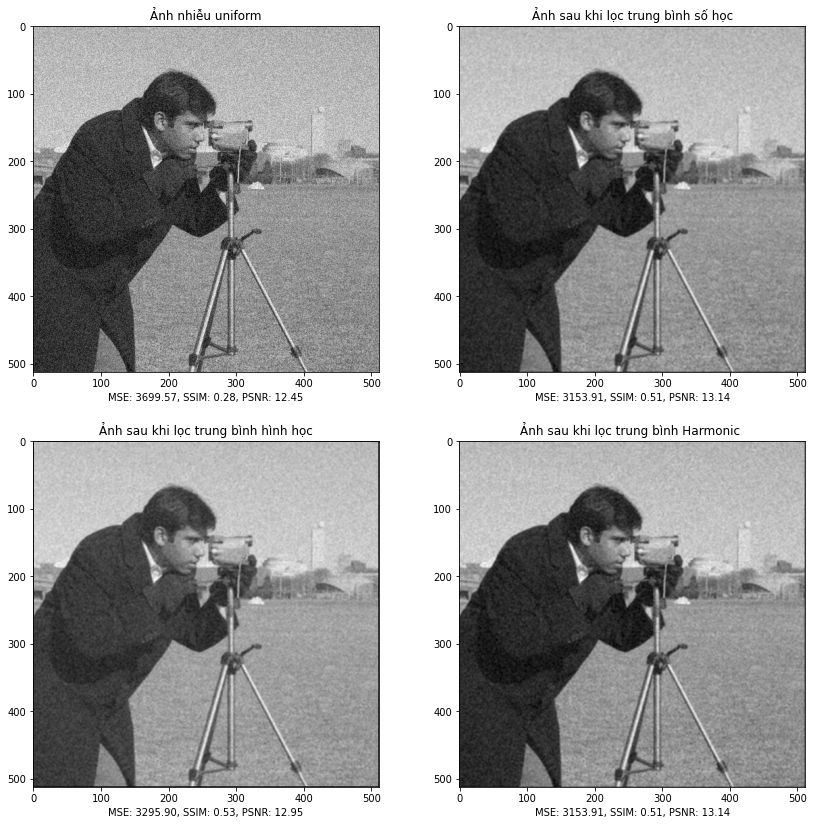

In [ ]:
x = image_restoration()
x.locTB()

#Lọc thống kê

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


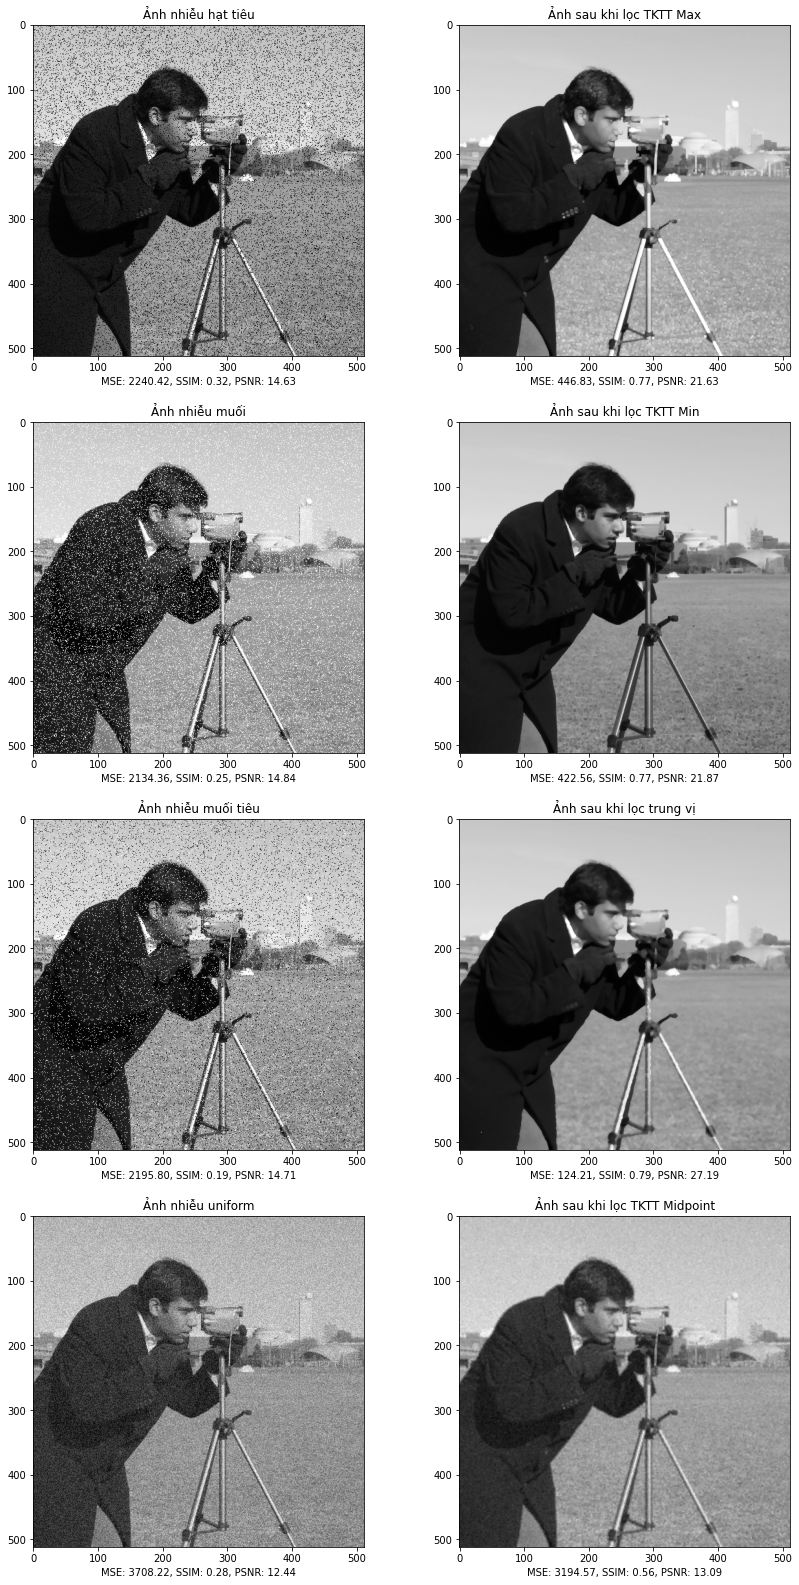

In [ ]:
x = image_restoration()
x.locTK()

#Lọc thích nghi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.


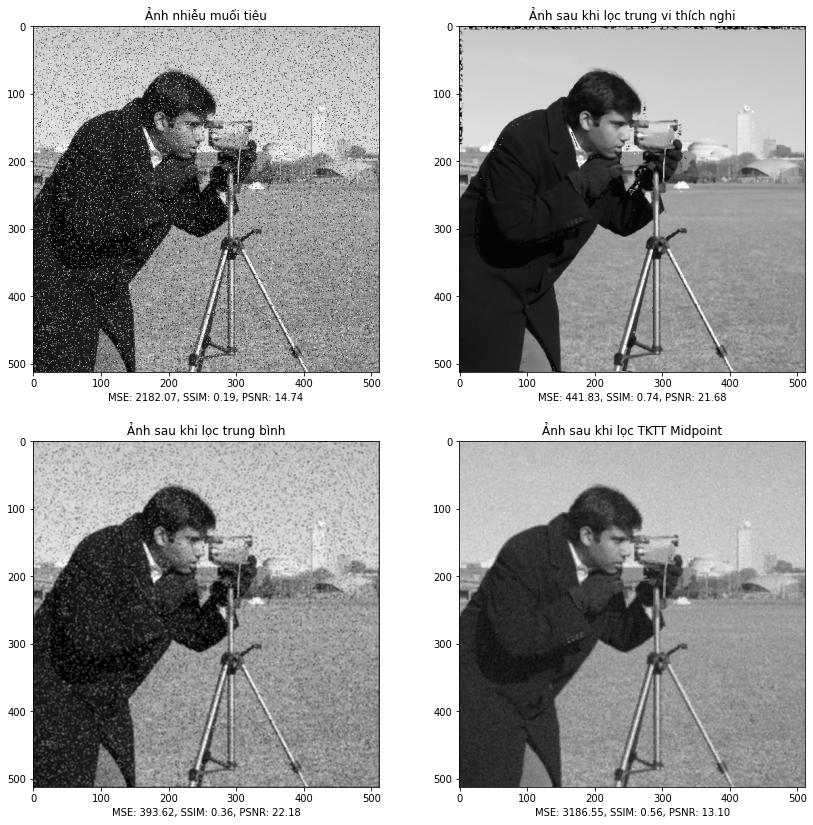

In [ ]:
from skimage import data # lấy ảnh có sẵn trong skimage để demo
x = image_restoration(input = data.camera())
x.locThichNghi()